# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import string

# Importing dataset

In [2]:
df=pd.read_csv("SMSSpamCollection.csv",sep="\t",names=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

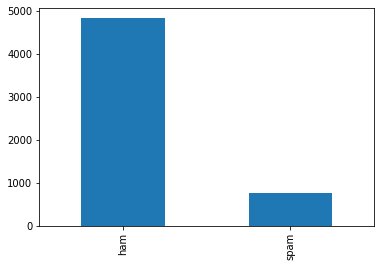

In [7]:
df["label"].value_counts().plot.bar()

In [8]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['target'] = df["label"].map({'ham':0, 'spam':1})

In [10]:
df.head()

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Word Cloud

In [11]:
from wordcloud import WordCloud

In [12]:
import nltk
ps=nltk.PorterStemmer()

In [13]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [14]:
spam_ = df[df["target"] == 1]["text"]
ham_= df[df["target"] == 0]["text"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 


def extractSpamWords(spamMessages):
    global spam_words
    words=" ".join(ps.stem(word) for word in spamMessages.split())
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words=" ".join(ps.stem(word) for word in hamMessages.split())
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords  and word.lower().isalpha()]
    ham_words = ham_words + words

spam_.apply(extractSpamWords)
ham_.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

# Spam Word Cloud

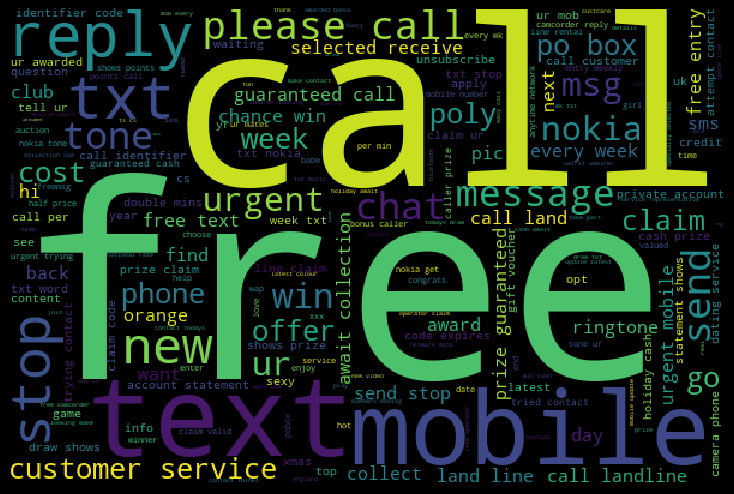

In [15]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Ham Word Cloud

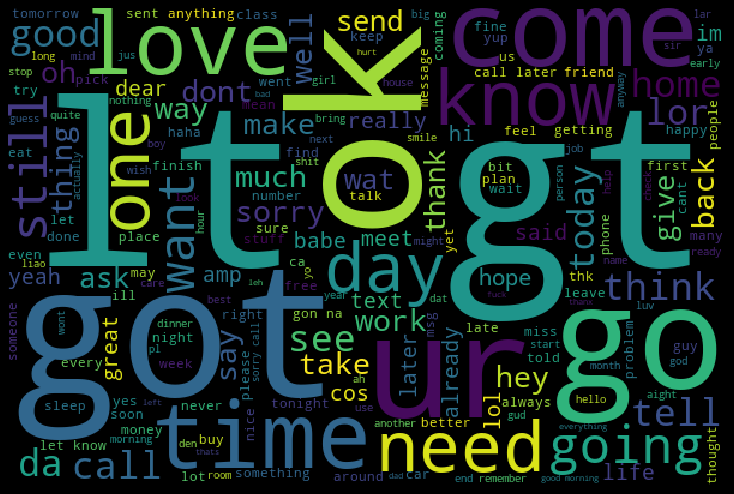

In [16]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [17]:
spam_words = np.array(spam_words)
print("Top 10 Spam words are :")
pd.Series(spam_words).value_counts().head(10)

Top 10 Spam words are :


call      346
free      217
txt       156
u         145
ur        144
mobile    123
text      121
stop      118
claim     113
reply     104
dtype: int64

In [18]:
ham_words = np.array(ham_words)
print("Top 10 Ham words are :")
pd.Series(ham_words).value_counts().head(10)

Top 10 Ham words are :


u       991
gt      318
lt      316
get     302
go      249
ur      247
ok      247
got     245
know    235
like    233
dtype: int64

# Removing stopwords and other elements

In [19]:
def cleaning(msg):
    msg=msg.lower()
    msg=" ".join(word for word in msg.split() if word not in stopwords)
    msg=" ".join(ps.stem(word) for word in msg.split())
    msg = " ".join(word for word in msg.split() if word.isalpha())
    return msg

In [20]:
df['feature']=df['text'].apply(cleaning)

In [21]:
df.head()

,label,text,target,feature
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong avail bugi n great world la e cine g...
1,ham,Ok lar... Joking wif u oni...,0,ok joke wif u
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli u c alreadi
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe live around though


# Applying Scikit learn library

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['feature'], df['label'], test_size = 0.15, random_state = 99)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
X_train=vect.fit_transform(X_train)

In [24]:
X_train

<4736x4579 sparse matrix of type '<class 'numpy.int64'>'
	with 28259 stored elements in Compressed Sparse Row format>

In [25]:
print(vect.get_feature_names())

['aa', 'aah', 'aaniy', 'abdomen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abouta', 'abroad', 'absolut', 'abt', 'abta', 'ac', 'academ', 'acc', 'accentur', 'accept', 'access', 'accid', 'accident', 'accommod', 'accommodationvouch', 'accordin', 'account', 'ach', 'achiev', 'acknowledg', 'across', 'act', 'actin', 'action', 'activ', 'actor', 'actual', 'ad', 'adam', 'add', 'addi', 'addict', 'address', 'adewal', 'admin', 'administr', 'admir', 'admiss', 'admit', 'ador', 'adrian', 'adrink', 'adsens', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'advisor', 'aeronaut', 'afew', 'affair', 'affection', 'affidavit', 'afford', 'afraid', 'african', 'aft', 'afternoon', 'aftr', 'ag', 'agalla', 'age', 'agent', 'ago', 'agre', 'ah', 'aha', 'ahead', 'ahmad', 'ahold', 'aid', 'aig', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'ajith', 'ak', 'aka', 'al', 'albi', 'album', 'alert', 'alett', 'alex', 'alfi', 'algarv', 'algebra', 'algorithm', 'ali', 'all', 'allah', 'allalo', 'all

In [26]:
X_test = vect.transform(X_test)
X_test

<836x4579 sparse matrix of type '<class 'numpy.int64'>'
	with 4633 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train)
tfidf_transformer.transform(X_train)


<4736x4579 sparse matrix of type '<class 'numpy.float64'>'
	with 28259 stored elements in Compressed Sparse Row format>

# Using Supprt Vector Machine

In [28]:
from sklearn.svm import SVC

In [29]:

svm=SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred = svm.predict(X_test) 

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
print(accuracy_score(y_test, y_pred))

0.9808612440191388


In [33]:
print(confusion_matrix(y_test, y_pred))

[[725   3]
 [ 13  95]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       728
        spam       0.97      0.88      0.92       108

    accuracy                           0.98       836
   macro avg       0.98      0.94      0.96       836
weighted avg       0.98      0.98      0.98       836



# Using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred1=logreg.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_pred1))

0.9760765550239234


In [39]:
print(confusion_matrix(y_test, y_pred1))

[[725   3]
 [ 17  91]]


In [40]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       728
        spam       0.97      0.84      0.90       108

    accuracy                           0.98       836
   macro avg       0.97      0.92      0.94       836
weighted avg       0.98      0.98      0.98       836



# Using MultiNomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
y_pred2=nb.predict(X_test)

In [44]:
print(accuracy_score(y_test, y_pred2))

0.9700956937799043


In [45]:
print(confusion_matrix(y_test, y_pred2))

[[715  13]
 [ 12  96]]


In [46]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       728
        spam       0.88      0.89      0.88       108

    accuracy                           0.97       836
   macro avg       0.93      0.94      0.93       836
weighted avg       0.97      0.97      0.97       836



# Using GridSearch CV for HyperParameter Tuning in Support Vector Machine

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [49]:
grid = GridSearchCV(SVC(kernel='linear'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.4s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.4s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   26.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [50]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [51]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
grid_predictions = grid.predict(X_test)

In [53]:
print(confusion_matrix(y_test,grid_predictions))

[[725   3]
 [ 13  95]]


In [54]:
print(accuracy_score(y_test, grid_predictions))

0.9808612440191388


In [55]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       728
        spam       0.97      0.88      0.92       108

    accuracy                           0.98       836
   macro avg       0.98      0.94      0.96       836
weighted avg       0.98      0.98      0.98       836



# Creating a Model Using

In [56]:
import joblib

In [57]:
joblib.dump(grid, "ModelPrediction")

['ModelPrediction']

# Using Tkinter

In [59]:
import pickle
import joblib
import tkinter as tk
from tkinter import *
from tkinter import messagebox

model = joblib.load("ModelPrediction")


def detect():
    user_input = t1.get()
    feature=model.predict(vect.transform([user_input]))
    if feature[0]=='ham':
        messagebox.showinfo("Result","Message is Safe ....  Not Spam......")
    else:
        messagebox.showinfo("Result","!!!!!!!Warning .... A Spam message is recived.....")

window = tk.Tk()
window.title("Spam Detection")
window.geometry('500x250')

l1= tk.Label(window, text="Enter the message", font = ('Algerian',20))
l1.place(x=100, y=20)

t1 = tk.Entry(window, width=70, border = 5)
t1.place(x=20, y=60)

b1 = tk.Button(window, text="Detect", font=('Algerian', 15), bg = "white", fg="black", command=detect)
b1.place(x=200, y=100)
b2 = tk.Button(window, text="Quit", font=("Algerian", 15), fg="red", bg = "white", command=quit)
b2.place(x=210, y=200)

window.mainloop()